<a href="https://colab.research.google.com/github/Aditi-T27/ASL_NLP/blob/main/P_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


This model is only for CNN , The code provided within the CNN folder comprises of the downloaded model trained from this notebook.
The LSTM model is purely independent from the CNN model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image

# Replace 'path/to/image.jpg' with the path to your image file
image_path = '/content/drive/MyDrive/5.png'

# Open the image
image = Image.open(image_path)

# Get the image size (width, height)
width, height = image.size

# Print the image size
print(f'Image Size: {width}x{height} pixels')


In [ ]:
# Resize of single image

from PIL import Image

# Replace 'path/to/image.jpg' with the path to your image file
image_path = '/content/drive/MyDrive/resized_Image/A/0.png'

# Open the image
image = Image.open(image_path)

# Resize the image to 64x64 pixels
resized_image = image.resize((64, 64))

# Save the resized image (optional)
resized_image.save('resized_image.jpg')

# Show the resized image (optional)
resized_image.show()


# Get the image size (width, height)
width, height = resized_image.size

# Print the image size
print(f'Image Size: {width}x{height} pixels')


In [ ]:
import cv2
import numpy as np

# Step 1: Read the image
  # Replace with your image path
image = cv2.imread(resized_image, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale

# Step 2: Check if the image is loaded correctly
if image is None:
    print("Error: Image not loaded. Check the file path.")
else:
    print("Image loaded successfully!")

# Step 3: Convert to NumPy array and print shape
print("Shape of the image array:", image.shape)  # (Height, Width)
print("Image array:")
print(image)

# Step 4: Flatten the image array (optional)
flattened_array = image.flatten()  # Flattens 2D array to 1D
print("Flattened array shape:", flattened_array.shape)


In [ ]:

# Resize images and store in folder
import os
import cv2

# Path to the main folder containing subfolders (A, B, C, ..., Z)
input_folder = '/content/drive/MyDrive/Image'  # Change this to the main folder path
output_folder = '/content/drive/MyDrive/resized_Image'  # Change this to the folder where resized images will be saved

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through each subfolder (A, B, C, ..., Z)
for subfolder in os.listdir(input_folder):
    subfolder_path = os.path.join(input_folder, subfolder)

    # Check if it's a folder
    if os.path.isdir(subfolder_path):
        # Create a corresponding subfolder in the output directory
        output_subfolder_path = os.path.join(output_folder, subfolder)
        os.makedirs(output_subfolder_path, exist_ok=True)

        # Loop through all images in the current subfolder
        for filename in os.listdir(subfolder_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):  # Process only image files
                image_path = os.path.join(subfolder_path, filename)  # Full path to the image
                image = cv2.imread(image_path)  # Read the image

                # Check if the image is loaded correctly
                if image is None:
                    print(f"Warning: Could not read {image_path}, skipping...")
                    continue

                # Convert image to grayscale and resize it to 64x64
                grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                resized_image = cv2.resize(grayscale_image, (64, 64))  # Resize to 64x64

                # Save the resized image to the output subfolder
                output_path = os.path.join(output_subfolder_path, filename)
                cv2.imwrite(output_path, resized_image)

                print(f'Resized and saved {output_path}')

print('All images have been resized and saved successfully!')


In [ ]:
import os
import cv2
import numpy as np

input_folder = '/content/drive/MyDrive/resized_Image'  # Path to your output folder

X = []  # To store image arrays
y = []  # To store labels (subfolder names like A, B, C, etc.)

for subfolder in os.listdir(input_folder):
    subfolder_path = os.path.join(input_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(subfolder_path, filename)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image = image / 255.0  # Normalize the image (optional)
                X.append(image)
                y.append(subfolder)  # Label corresponds to the subfolder name

X = np.array(X)  # Convert list to NumPy array
y = np.array(y)  # Convert labels to NumPy array

print(f"Shape of X: {X.shape}")  # Should be (num_samples, 64, 64)
print(f"Shape of y: {y.shape}")  # Labels corresponding to each image


Shape of X: (806, 64, 64)
Shape of y: (806,)


In [ ]:
print(X[0].shape)

(64, 64)


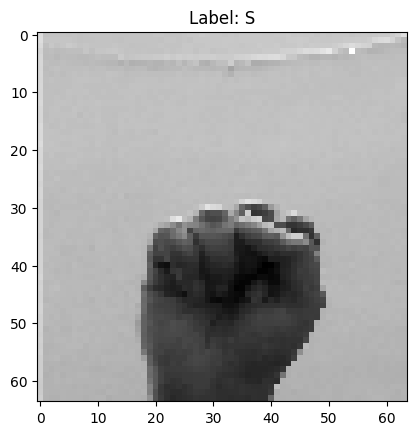

In [ ]:
# Visualize the first image in the training set
plt.imshow(X[34], cmap='gray')  # Show the first image (index 0) in grayscale
plt.title(f"Label: {y[34]}")  # Display the label for the image
plt.show()


Shape of X (images): (806, 64, 64)
Shape of y (labels): (806,)
Encoded labels: [19 19 19 19 19 19 19 19 19 19]


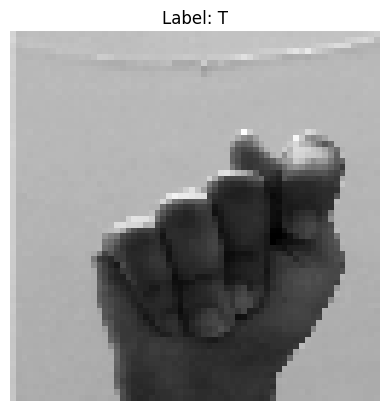

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to process the images in the dataset
def preprocess_images_and_labels(base_path, image_size=(64, 64)):
    image_list = []  # To store image data
    label_list = []  # To store labels

    # Iterate through subfolders (a to z, or any other subfolder structure)
    for folder_name in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder_name)

        # Ensure we're dealing with a folder, not a file
        if os.path.isdir(folder_path):
            label = folder_name  # Use the folder name as the label

            # Iterate through all image files in the folder
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)

                # Read the image in grayscale
                img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                # Resize the image to the specified size (e.g., 64x64)
                img_resized = cv2.resize(img, image_size)

                # Normalize the pixel values by dividing by 255
                img_normalized = img_resized / 255.0

                # Append the image and label to the respective lists
                image_list.append(img_normalized)
                label_list.append(label)

    # Convert the lists to NumPy arrays
    X_data = np.array(image_list)
    y_label = np.array(label_list)

    return X_data, y_label

# Define the path to your dataset
base_path = '/content/drive/MyDrive/resized_Image'  # Replace with the path to your dataset folder

# Preprocess images and labels
X_data, y_label = preprocess_images_and_labels(base_path)

# Print the shapes of the resulting arrays
print(f"Shape of X (images): {X_data.shape}")  # Should be (num_images, 64, 64)
print(f"Shape of y (labels): {y_label.shape}")  # Should be (num_images,)

# If needed, you can convert the labels into numerical format (e.g., using LabelEncoder or one-hot encoding)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_label)  # Encode labels as integers
print(f"Encoded labels: {y_encoded[:10]}")  # Display first 10 encoded labels

# If you'd like to visualize the first image in the dataset:
plt.imshow(X_data[0], cmap='gray')
plt.title(f"Label: {y_label[0]}")
plt.axis('off')
plt.show()


In [ ]:
print(X_data)

In [ ]:
X_data.shape

(806, 64, 64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_encoded, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (644, 64, 64), (644,)
Test set shape: (162, 64, 64), (162,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
print("Encoded labels:",y_encoded[100:300])


In [ ]:
(X_train.reshape(X_train.shape[0], 64, 64, 1)).shape

(644, 64, 64, 1)

In [ ]:
# Reshape X_data for CNN input
X_cnn = X_train.reshape(X_train.shape[0], 64, 64, 1)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')  # Assuming 26 classes for A-Z
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
# X_cnn -> input images, y_labels -> corresponding labels (numerical form)
model.fit(X_cnn, y_encoded, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,627,930 (6.21 MB)

 Trainable params: 1,627,930 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.0673 - loss: 3.1087 - val_accuracy: 0.0000e+00 - val_loss: 5.6198
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.0631 - loss: 2.9098 - val_accuracy: 0.0000e+00 - val_loss: 6.3401
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.0529 - loss: 2.8759 - val_accuracy: 0.0000e+00 - val_loss: 7.7477
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.0871 - loss: 2.8224 - val_accuracy: 0.0000e+00 - val_loss: 6.4019
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.1227 - loss: 2.7940 - val_accuracy: 0.0000e+00 - val_loss: 8.5613
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - accuracy: 0.1385 - loss: 2.7762 - val_accuracy: 0.0000e+00 - val_loss: 8.7190
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.1513 - loss: 2.6282 - val_accuracy: 0.0000e+00 - val_loss: 7.4441
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.2034 - los

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(y_label, return_counts=True)
plt.bar(unique, counts)
plt.title("Class Distribution in Training Set")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")


In [ ]:
# altering shape of cnn reshaping to match cnn input
X_train_cnn = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_test_cnn=X_test.reshape(X_test.shape[0], 64, 64, 1)

In [ ]:
# altering shape of cnn reshaping to match cnn input
X_train_cnn.shape
X_test_cnn.shape

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

# ----------------------------------
# 1. Data Augmentation
# ----------------------------------
datagen = ImageDataGenerator(
    rotation_range=20,        # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    zoom_range=0.2,           # Randomly zoom in on images
    horizontal_flip=True      # Randomly flip images horizontally
)

datagen.fit(X_train_cnn)  # Apply augmentations on training data

# ----------------------------------
# 2. CNN Model Definition
# ----------------------------------
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to avoid overfitting

# Fully Connected Layer 2 (Output Layer)
num_classes = len(np.unique(y_train))  # Number of unique classes
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ----------------------------------
# 3. Train the Model
# ----------------------------------
history = model.fit(
    datagen.flow(X_train_cnn, y_train, batch_size=32),
    epochs=80,
    validation_data=(X_test_cnn, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)



Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 293ms/step - accuracy: 0.0393 - loss: 3.2692 - val_accuracy: 0.0309 - val_loss: 3.2621
Epoch 2/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - accuracy: 0.0409 - loss: 3.2582 - val_accuracy: 0.0247 - val_loss: 3.2594
Epoch 3/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step - accuracy: 0.0406 - loss: 3.2575 - val_accuracy: 0.0185 - val_loss: 3.2603
Epoch 4/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.0388 - loss: 3.2575 - val_accuracy: 0.0309 - val_loss: 3.2614
Epoch 5/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.0409 - loss: 3.2534 - val_accuracy: 0.0185 - val_loss: 3.2745
Epoch 6/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - accuracy: 0.0695 - loss: 3.2477 - val_accuracy: 0.0494 - val_loss: 3.2380
Epoch 7/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 0.0588 - loss: 3.2263 - val_accuracy: 0.0370 - val_loss: 3.1886
Epoch 8/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.0540 - loss: 3.1822 - val_accuracy: 0.1173 - val_

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8853 - loss: 0.5392
Test Loss: 0.4988, Test Accuracy: 0.8951
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


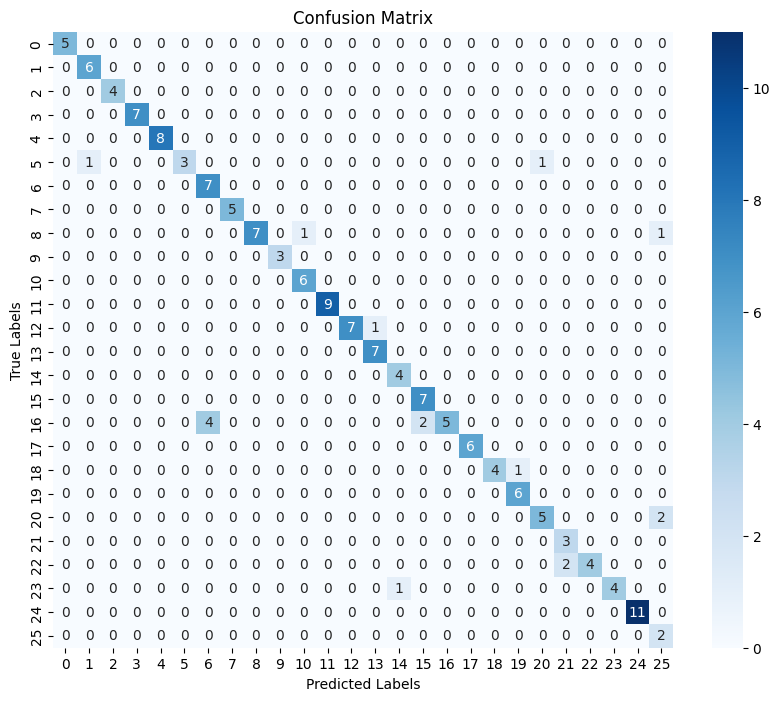

In [ ]:

# ----------------------------------
# 4. Model Evaluation
# ----------------------------------
test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# ----------------------------------
# 5. Confusion Matrix
# ----------------------------------
y_pred = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random test sample (for example, test index 5)
index = 100
test_image = X_test_cnn[index]  # Select the image
true_label = y_test[index]  # True label of the image

# Reshape the image to match the input shape of the model (if needed)
test_image = test_image.reshape(1, 64, 64, 1)  # Add batch dimension if needed

# Predict the label using the model
predicted_label = model.predict(test_image)

# Get the predicted class label (use argmax to get the class index)
predicted_class = np.argmax(predicted_label, axis=-1)

# Print the result
print(f"True Label: {true_label}")
print(f"Predicted Label: {predicted_class[0]}")

# Display the test image
plt.imshow(X_test[index].reshape(64, 64), cmap="gray")
plt.title(f"True Label: {true_label}, Predicted: {predicted_class[0]}")
plt.show()


In [ ]:
model.save("model.h5")


In [ ]:
# Save the model in the native Keras format
model.save('my_model.keras')


In [ ]:
model.save('my_model.h5')


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load your trained model
model = load_model('my_model.keras')  # Update the path if needed

# Load the uploaded image
img_path = next(iter(uploaded))  # Get the name of the uploaded file
img = image.load_img(img_path, target_size=(64, 64), color_mode='grayscale')  # Adjust target_size as per your model input

# Preprocess the image: Convert to numpy array, normalize it, and add batch dimension
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = img_array / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (model expects batches)

# Predict the class
prediction = model.predict(img_array)

# Output the prediction
print("Prediction:", prediction)

plt.imshow(img, cmap='gray')  # Display the image in grayscale
plt.show()

predicted_class = np.argmax(prediction, axis=1)  # Get the class with the highest probability
print("Predicted class:", predicted_class)


In [ ]:
import tensorflow as tf
print(tf.__version__)


In [ ]:
import os
import numpy as np
from flask import Flask, request, render_template, redirect, url_for
from werkzeug.utils import secure_filename
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

# Initialize the Flask app
app = Flask(__name__)

# Set the folder for storing uploaded images
UPLOAD_FOLDER = 'static/uploads'
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Load the trained CNN model
model = load_model('my_model.keras')  # Ensure 'my_model.keras' is in the project directory

# Route for the home page
@app.route('/')
def index():
    return render_template('index.html')

# Route for handling image uploads
@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return redirect(request.url)

    file = request.files['file']
    if file.filename == '':
        return redirect(request.url)

    if file:
        # Save the uploaded image to the uploads folder
        filename = secure_filename(file.filename)
        filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
        file.save(filepath)

        # Load and preprocess the image
        image_size = (64, 64)  # Update if your model input size is different
        img = load_img(filepath, target_size=image_size, color_mode="grayscale")  # Change 'grayscale' if your model requires it
        img_array = img_to_array(img) / 255.0  # Normalize the image
        img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the input shape (1, 64, 64, 1)

        # Predict the class of the image using the trained model
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)[0]  # Assuming the output is one-hot encoded

        return render_template('index.html', prediction=predicted_class, image_path=filepath)
    else:
        return redirect(request.url)

# Run the app
if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
from keras.models import load_model
# Load the model file (ensure the path is correct)
model = load_model('model.h5')

# Check the model summary to see if it loaded properly
model.summary()

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.1
